# 지도학습 알고리즘 3

### 1. 라소
선형회귀 규제화에서 리지 대안으로 사용

In [3]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.datasets import load_boston

boston = load_boston
X, y = mglearn.datasets.load_extended_boston ()

from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split (X, y, random_state = 0)

In [5]:
from sklearn.linear_model import Lasso

#### [alpha 값 = 1]

In [6]:
lasso = Lasso( ).fit(X_train , y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train , y_train)))
print("평가용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test , y_test)))
print("사용한 피처의 개수 : ", np.sum(lasso.coef_ !=0))


학습용 데이터 세트 점수 : 0.29
평가용 데이터 세트 점수 : 0.21
사용한 피처의 개수 :  4


#### ◦ Lasso를 이용한 학습용 데이터 세트와 평가용 데이터 세트 점수가 0.29와 0.21이다(리지는 0.89와 0.75)
◦ 또한, 사용한 피처의 개수는 4개이다                                               
◦ alpha = 1.0 이 기본인데, 과소적합을 줄이기 위해 alpha 값을 줄여 적용한다(이때, 반복 실행횟수 기본값을 늘려야 한다)

#### [alpha 값 = 0.01]

In [7]:
lasso_001 = Lasso(alpha=0.01,max_iter =100000).fit(X_train , y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso_001.score(X_train , y_train)))
print("평가용 데이터 세트 점수 : {:.2f}".format(lasso_001.score(X_test , y_test)))
print("사용한 피처의 개수 :",np.sum(lasso_001.coef_ !=0))
      

학습용 데이터 세트 점수 : 0.90
평가용 데이터 세트 점수 : 0.77
사용한 피처의 개수 : 33


#### ◦ max_iter 값을 사용하지 않으면 적용하라는 경고가 나타난다
◦ alpha 값을 낮추어 성능 향상을 가져왔다                                           
◦ 사용한 피처는 33개로 증가했다

#### [alpha 값 = 0.0001]

In [8]:
lasso_00001 = Lasso(alpha=0.0001, max_iter=100000 ).fit(X_train, y_train)
print("학습용 데이터 세트 점수: {:.2f}".format(lasso_00001.score(X_train, y_train)))
print("평가용 데이터 세트 점수: {:.2f}".format(lasso_00001.score(X_test, y_test)))
print("사용한 피처의 개수:", np.sum(lasso_00001.coef_ !=0))
      

학습용 데이터 세트 점수: 0.95
평가용 데이터 세트 점수: 0.64
사용한 피처의 개수: 96


#### ◦ 학습용 점수는 증가
◦ 하지만, 평가용 점수 감소                                                         
◦ 과대적합이 되었다

#### alpha 값이 다른 경우 계수의 크기

Text(0, 0.5, 'coefficient size')

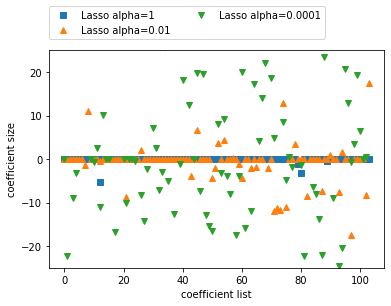

In [9]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha=1")
plt.plot(lasso_001.coef_, '^', label = "Lasso alpha=0.01")
plt.plot(lasso_00001.coef_, 'v', label = "Lasso alpha=0.0001")
plt.legend(ncol=2, loc=(0, 1.05))

plt.ylim(-25, 25)
plt.xlabel("coefficient list")
plt.ylabel("coefficient size")

#### ◦ alpha=1 일 때 계수는 0에 가까움
◦ alpha=0.0001일때 계수 대부분이 0이 아니고 값이 커져서 규제를 받지 않는 모델이 됨  
◦ 일반적으로 리지 회귀 모델을 선호하지만, 많은 피처 중에서 일부 피처를 선호한다면, Lasso 모델이 좋은 선택일 수 있다

### 2. 분류용 선형 모델

#### (회귀방정식은 구체적인 숫자를, 분류용 선형 모델은 a냐 b냐 나누는)

### 로지스틱 회귀, 서포트 벡터 머신


#### 로지스틱 회귀와 서포트 벡터 머신(SVM)이 만든 결정 경계를 그림으로 표시

C:\Users\kimyeeun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\kimyeeun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kimyeeun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


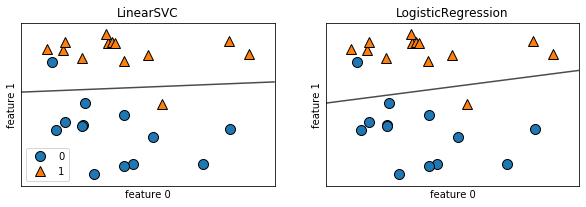

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)

    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

#### ◦ 위의 두 알고리즘은 기본적으로 L2 규제를 사용한다(Ridge와 동일, 과대적합 감소)
◦ SVC와 로지스틱 회귀는 규제를 위한 매개변수 C가 있다                             
◦ 매개변수 C의 값이 높아지면 규제가 감소한다(학습용 데이터 세트와 유사)           
◦ C의 값을 낮추면 계수 벡터(w)가 0에 가까워진다(피처가 영향을 못 미친다)

#### C 값에 따른 결정 경계 차이 확인하기

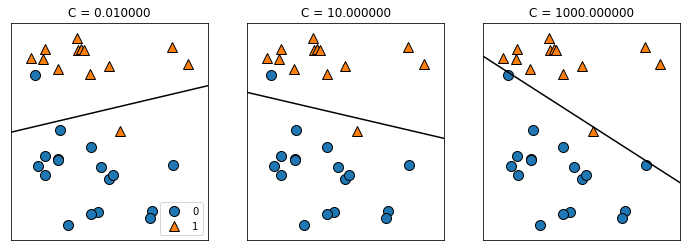

In [11]:
mglearn.plots.plot_linear_svc_regularization()

#### ◦ 왼쪽은 규제가 많이 적용, 오른쪽 모델은 과대적합

### 2-1. 다중 클래스 분류용 선형 모델

### LinearSVC

#### 3개 class 그림 그리기

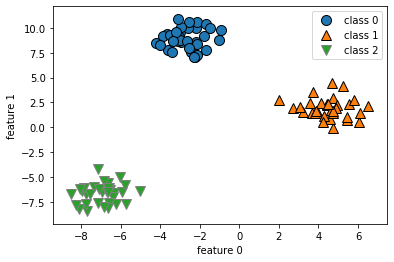

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"])

#### LinearSVC 분류기를 이용하여 데이터 세트 학습

In [13]:
linear_svm = LinearSVC().fit(X, y)
print("회귀 계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

회귀 계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


#### ◦ 회귀 계수 배열의 크기-> 행: 3가지 클래스, 열: 2가지 피처                         
◦ 절편은 각 클래스의 1차원 벡터

#### 3개의 이진 분류기가 만든 경계 시각화

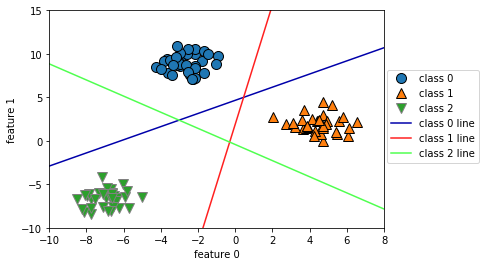

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 line', 'class 1 line','class 2 line'], loc=(1.01, 0.3))
            

#### ◦ 클래스 0 은 파랑색 라인, 클래스 1은 주황색 라인, 클래스 2는 녹색 라인으로구분되었다
◦ 새로운 데이터가 라인 안쪽에 위치하면 그 클래스에 분류한다                       
◦ 단, 가운데 삼각형 부분은 가장 가까운 라인에 분류한다

#### 평면 분류 예측 결과

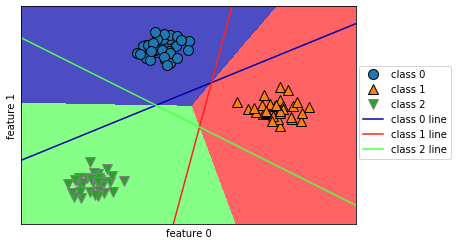

In [15]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line=np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 line', 'class 1 line','class 2 line'], loc=(1.01, 0.3))


#### 위의 그림은 앞의 그림과 같지만, 2차원 분류 그림을 이용한 결과이다

#### ◦ L1 규제는 중요한 피처가 많지 않을 경우 사용                                      
◦ L2 규제는 기본적으로 사용(과대적합을 줄임)

#### 일반적으로 리지를 사용하지만, 데이터 셋에 중요한 피처가 많지 않으면 라소

### 3. 나이브 베이즈 분류기

In [16]:
from sklearn.naive_bayes import GaussianNB

tennis_data = pd.read_csv('D:/학교/4학년/빅데이터분석실습/6주차/playtennis.csv')
tennis_data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


#### 데이터 전처리

In [17]:
tennis_data.outlook = tennis_data.outlook.replace('Sunny', 0)
tennis_data.outlook = tennis_data.outlook.replace('Overcast', 1)
tennis_data.outlook = tennis_data.outlook.replace('Rain', 2)

tennis_data.temp = tennis_data.temp.replace('Hot', 3)
tennis_data.temp = tennis_data.temp.replace('Mild', 4)
tennis_data.temp = tennis_data.temp.replace('Cool', 5)

tennis_data.humidity = tennis_data.humidity.replace('High', 6)
tennis_data.humidity = tennis_data.humidity.replace('Normal', 7)

tennis_data.wind = tennis_data.wind.replace('Weak', 8)
tennis_data.wind = tennis_data.wind.replace('Strong', 9)

tennis_data.play = tennis_data.play.replace('No', 10)
tennis_data.play = tennis_data.play.replace('Yes', 11)

tennis_data

,day,outlook,temp,humidity,wind,play
0,D1,0,3,6,8,10
1,D2,0,3,6,9,10
2,D3,1,3,6,8,11
3,D4,2,4,6,8,11
4,D5,2,5,7,8,11
5,D6,2,5,7,9,10
6,D7,1,5,7,9,11
7,D8,0,4,6,8,10
8,D9,0,5,7,8,11
9,D10,2,4,7,8,11


#### 데이터세트 분리

In [18]:
X = np.array(pd.DataFrame(tennis_data, columns = ['outlook', 'temp', 'humidity', 'wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['play']))


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

### 나이브 베이즈 모델 생성

In [20]:
gnb_clf = GaussianNB()
gnb_clf = gnb_clf.fit(X_train, y_train)

C:\Users\kimyeeun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
gnb_prediction = gnb_clf.predict(X_test)
print(gnb_prediction)

[10 10 11 11]


#### 분류 성능 측정

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, gnb_prediction))

Confusion Matrix:
[[1 0]
 [1 2]]


In [24]:
print('Classification Report')
print(classification_report(y_test, gnb_prediction))

Classification Report
              precision    recall  f1-score   support

          10       0.50      1.00      0.67         1
          11       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [25]:
fmeasure = round(f1_score(y_test, gnb_prediction, average= 'weighted'), 2)
accuracy = round(accuracy_score(y_test, gnb_prediction, normalize = True), 2)


In [26]:
df_nbclf = pd.DataFrame(columns = ['Classifier', 'F-Measure', 'Accuracy'])
df_nbclf.loc[len(df_nbclf)] = ['Naïve Bayes', fmeasure, accuracy]
df_nbclf

,Classifier,F-Measure,Accuracy
0,Naïve Bayes,0.77,0.75


#### 실제 데이터를 입력하여 분류 확인

In [27]:
A_prediction = gnb_clf.predict([[0, 5, 6, 9]])
print(A_prediction)

[10]
